# Adversarial Learning

![street fighter](assets/adversarial/street_fighter.jpg)

(image: https://www.flickr.com/photos/sbfisher/856125311, [Creative Commons License](https://creativecommons.org/licenses/by-nc-sa/2.0/))

# Topics

- Adversarial examples
- Generative Adversarial Networks

# Adversarial Examples

Data inputs that fool neural networks, but not people

![example](assets/adversarial/adversarial_example.png)

(image: [Deep Learning](http://www.deeplearningbook.org/contents/regularization.html), Ian Goodfellow and Yoshua Bengio and Aaron Courville)

## Walkthrough - Adversarial Examples

In this walkthrough, we will see how a Neural Network handles adversarial examples.

1. Get predictions for an image
2. Convert image to an adversarial example
3. Re-evaluate the adversarial example

### Setup - Install Foolbox

Foolbox is a Python toolbox to create adversarial examples that fool neural networks.

https://github.com/bethgelab/foolbox

Types of attacks: https://foolbox.readthedocs.io/en/latest/modules/attacks.html

```
pip install foolbox
```

In [79]:
def resize_and_crop_image(image_path, width, height):
    """Resizes and crops an image to the desired size
    Args:
        image_path: path to the image
        width: image width
        height: image height
    Returns:
        the resulting image
    """
    from PIL import Image, ImageOps
    
    img = Image.open(image_path)
    img = ImageOps.fit(img, (width, height))
    return img

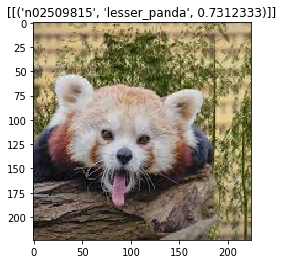

In [86]:
# 1. Get predictions for an image

from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array

import matplotlib.pyplot as plt
import numpy as np

model = ResNet50()
width = height = 224

# Labels: https://github.com/Microsoft/ELL-models/blob/master/models/ILSVRC2012/categories.txt
image_path = './assets/adversarial/panda.jpg'
label = 388 # lesser panda

img = resize_and_crop_image(image_path, width, height)
plt.imshow(img)

x = img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)
y = model.predict(x)
preds = decode_predictions(y, top=1)
plt.title(preds)
plt.show()

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\foolbox\attacks\base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'


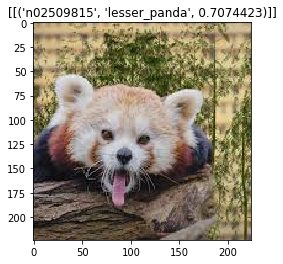

In [104]:
from keras.backend import set_learning_phase
from PIL import Image
import foolbox

# Example from: https://github.com/bethgelab/foolbox
set_learning_phase(0) # not training
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(ResNet50(), bounds=(0, 255),
                                   preprocessing=preprocessing)

# Apply attack on source image
# https://foolbox.readthedocs.io/en/latest/modules/attacks/gradient.html
# Adds the sign of the gradient to the image, gradually increasing the
# magnitude until the image is misclassified.
attack = foolbox.attacks.FGSM(fmodel)

#image, label = foolbox.utils.imagenet_example()

# Labels: https://github.com/Microsoft/ELL-models/blob/master/models/ILSVRC2012/categories.txt
image_path = './assets/adversarial/panda.jpg'
label = 388 # lesser panda
image = resize_and_crop_image(image_path, width, height)
image = np.asarray(image, dtype=np.float32)

#x = Image.open(image_path)
#x = x.resize((width, height))
#x = np.asarray(x, dtype=np.float32)
#x = x[:, :, :3]
#adversarial = attack(x[:, :, ::-1], label)
#x = preprocess_input(x)
adversarial = attack(image[:, :, ::-1], label)
y = model.predict(np.expand_dims(adversarial, axis=0))
preds = decode_predictions(y, top=1)

plt.imshow(adversarial[:, :, ::-1] / 255)  # ::-1 to convert BGR to RGB
plt.title(preds)
plt.show()

## Generative Adversarial Networks (GANs)

- Train two networks against each other
- Generator: generates fake images to fool Discriminator
- Discriminator: tries to distinguish real images from fake ones

## Generator
![generator](assets/adversarial/generator.png)

(image: https://towardsdatascience.com/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0)

## Discriminator
![discriminator](assets/adversarial/discriminator.png)

(image: https://towardsdatascience.com/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0)

## Adversarial Model

![adversarial model](assets/adversarial/adversarial_model.png)

(image: https://towardsdatascience.com/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0)


## Training a GAN
 
![training](assets/adversarial/training.png)

(image: https://towardsdatascience.com/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0)

## Examples

https://github.com/eriklindernoren/Keras-GAN

https://github.com/eriklindernoren/PyTorch-GAN

## Reading List

|Material|Read it for|URL|
|--|--|--|
|Section 7.13 Adversarial Training (Pages 265-266)|How to improve network robustness with adversarial examples|http://www.deeplearningbook.org/contents/regularization.html|
|Section 7.13 Generative Adversarial Networks (Pages 696-699|A short introduction on GANs (motivation, challenges)|http://www.deeplearningbook.org/contents/generative_models.html|
